In [4]:
import pandas as pd
import yfinance as yf
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed
lr confidence:  0.7437230730773473


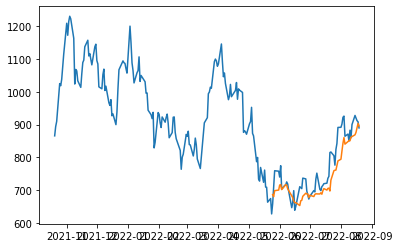

                 Close  Prediction
Date                              
2022-08-01  891.830017  794.675307
2022-08-02  901.760010  819.821418
2022-08-03  922.190002  843.157343
2022-08-04  925.900024  860.576890
2022-08-05  864.510010  840.503581
2022-08-08  871.270020  848.390775
2022-08-09  850.000000  851.557136
2022-08-10  883.070007  850.938244
2022-08-11  859.890015  861.690331
2022-08-12  900.090027  863.556166
2022-08-15  927.960022  869.001261
2022-08-16  919.690002  876.527492
2022-08-17  911.989990  890.223134
2022-08-18  908.609985  903.446480
2022-08-19  890.000000  895.716893


In [6]:
#@title Linear Regression
import warnings
warnings.filterwarnings("ignore")
data = yf.download(tickers='TSLA', #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="10mo",
 interval="1d") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
pd.set_option("max_rows", None)

df = data[['Close']]

df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['Volume'] = data[['Volume']]
# df['SMA_10'] = df['Close'].rolling(window=10).mean()
df = df.iloc[10:]

predict_df = df.iloc[-60:]

df.drop(df.tail(30).index,inplace = True)

# # df.ta.ema(close='Close', length=10, append=True)

X_train, X_test, y_train, y_test = train_test_split(df[['EMA_10', 'Volume']],df[['Close']], test_size=0.01)
# Test set
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_test = predict_df['Close']
X_test = predict_df.drop(['Close'], axis = 1)

y_pred = model.predict(X_test)
lr_confidence = model.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

df_compare = data[['Close']].tail(len(y_pred))
df_compare[['Prediction']] = y_pred.tolist()
# df_compare
plt.plot(data['Close'])
plt.plot(df_compare['Prediction'])
# print(df_compare)
plt.show()
print(df_compare.tail(15))


In [7]:
data = yf.download(tickers='TSLA', #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="10mo",
 interval="1d") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
pd.set_option("max_rows", None)

df = data[['Close']]
scale = MinMaxScaler(feature_range = (0,1))
scaled = scale.fit_transform(df)

train_len = int(len(scaled) * 0.75)
test = int(len(scaled)*0.25)
train = scaled[0:train_len, :]
test = scaled[train_len:len(scaled), :]



[*********************100%***********************]  1 of 1 completed


array([[0.39491482],
       [0.44177815],
       [0.46783546],
       [0.65924383],
       [0.64855834],
       [0.68084748],
       [0.74595766],
       [0.80737844],
       [0.96456989],
       [0.90376397],
       [0.97332772],
       [1.        ],
       [0.98700446],
       [0.88870779],
       [0.65698378],
       [0.73085157],
       [0.72347319],
       [0.6734691 ],
       [0.6401828 ],
       [0.70888237],
       [0.76584959],
       [0.77809719],
       [0.8457001 ],
       [0.87862064],
       [0.79911925],
       [0.81070208],
       [0.75406734],
       [0.84558366],
       [0.85849603],
       [0.77580387],
       [0.75852091],
       [0.64280841],
       [0.63290403],
       [0.70393018],
       [0.73253003],
       [0.62424591],
       [0.64623185],
       [0.56211045],
       [0.54898214],
       [0.57803071],
       [0.49648522],
       [0.50587454],
       [0.45164936],
       [0.51577902],
       [0.63267135],
       [0.72927292],
       [0.77404225],
       [0.764